#Clustering Menggunakan Algoritma K-Means (dengan Parameter Default)

Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Setelah ditentukan fitur-fitur yang akan digunakan sesuai dengan hasil visualisasi di Colab0: https://colab.research.google.com/drive/12xwqqv7F0ZF7hytN2U5kmlGr0_lHeOhG?ouid=106950143032811372632&usp=drive_link

Maka, dibuatlah clustering dengan menggunakan algoritma K-Means yang bertujuan untuk memahami karakter customer pada e-commerce XYZ.

Parameter algoritma yang digunakan yaitu parameter manual (berdasarkan rangkuman parameter https://docs.google.com/spreadsheets/d/1SwdHlndnVU8mGfc1X6n9RxK3bcWqKYSO6sVfMsIndkU/edit?usp=sharing ) yaitu:
1. Skema 2
2. Skema 3
3. Skema 4
4. Skema 5
5. Skema 6
6. Skema 7
7. Skema 8
8. Skema 9


Fitur yang dipakai adalah 3 fitur yang paling berkolerasi satu sama lain yaitu:

1. OrderCount
2. CouponUsed
3. HourSpendOnApp


In [1]:
#Data Loading

import pandas as pd


url = "https://github.com/ranidsr/projekmsib/raw/main/E%20Commerce%20Dataset.xlsx"
df = pd.read_excel(url, sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
#Update Dataframe berdasarkan fitur yang digunakan saja

df=df[['OrderCount', 'CouponUsed', 'HourSpendOnApp']]
df

,OrderCount,CouponUsed,HourSpendOnApp
0,1.0,1.0,3.0
1,1.0,0.0,3.0
2,1.0,0.0,2.0
3,1.0,0.0,2.0
4,1.0,1.0,NaN
...,...,...,...
5625,2.0,1.0,3.0
5626,2.0,1.0,3.0
5627,2.0,1.0,3.0
5628,2.0,2.0,4.0


In [ ]:
#Lihat rangkuman data apakah ada missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      5372 non-null   float64
 1   CouponUsed      5374 non-null   float64
 2   HourSpendOnApp  5375 non-null   float64
dtypes: float64(3)
memory usage: 132.1 KB


In [ ]:
#Handling Missing Values
import numpy as np

df.dropna(axis=0, how='any', subset=(['OrderCount', 'CouponUsed', 'HourSpendOnApp']), inplace=True)
df.reset_index()
df = pd.concat([df], ignore_index=True)

<ipython-input-5-cef5e865a2ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, how='any', subset=(['OrderCount', 'CouponUsed', 'HourSpendOnApp']), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      4861 non-null   float64
 1   CouponUsed      4861 non-null   float64
 2   HourSpendOnApp  4861 non-null   float64
dtypes: float64(3)
memory usage: 114.1 KB


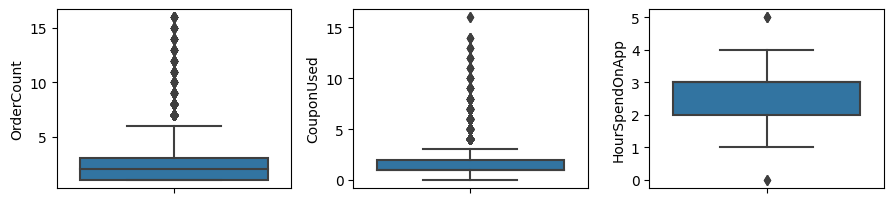

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#BoxPlot untuk melihat outliers

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
#fungsi untuk trimming outliers dengan IQR (Inter-Quartile Range)

def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['OrderCount', 'CouponUsed', 'HourSpendOnApp'], dtype='object')

In [ ]:
#apply fungsi ke kolom yang memiliki outliers

cols_outliers = ['OrderCount', 'CouponUsed', 'HourSpendOnApp']
for col in cols_outliers:
    df = handle_outliers(df , col)

df.head()

,OrderCount,CouponUsed,HourSpendOnApp
0,1.0,1.0,3.0
1,1.0,0.0,3.0
2,1.0,0.0,2.0
3,1.0,0.0,2.0
5,1.0,0.0,2.0


In [ ]:
#Lihat rangkuman data setelah trimming outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4013 entries, 0 to 4860
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      4013 non-null   float64
 1   CouponUsed      4013 non-null   float64
 2   HourSpendOnApp  4013 non-null   float64
dtypes: float64(3)
memory usage: 125.4 KB


In [ ]:
#reset index sesuai jumlah baris data

df.reset_index()
df = pd.concat([df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      4013 non-null   float64
 1   CouponUsed      4013 non-null   float64
 2   HourSpendOnApp  4013 non-null   float64
dtypes: float64(3)
memory usage: 94.2 KB


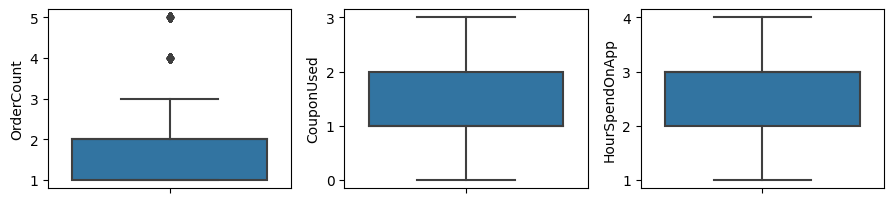

In [ ]:
#Boxplot setelah Trimming Outliers

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

<Axes: >

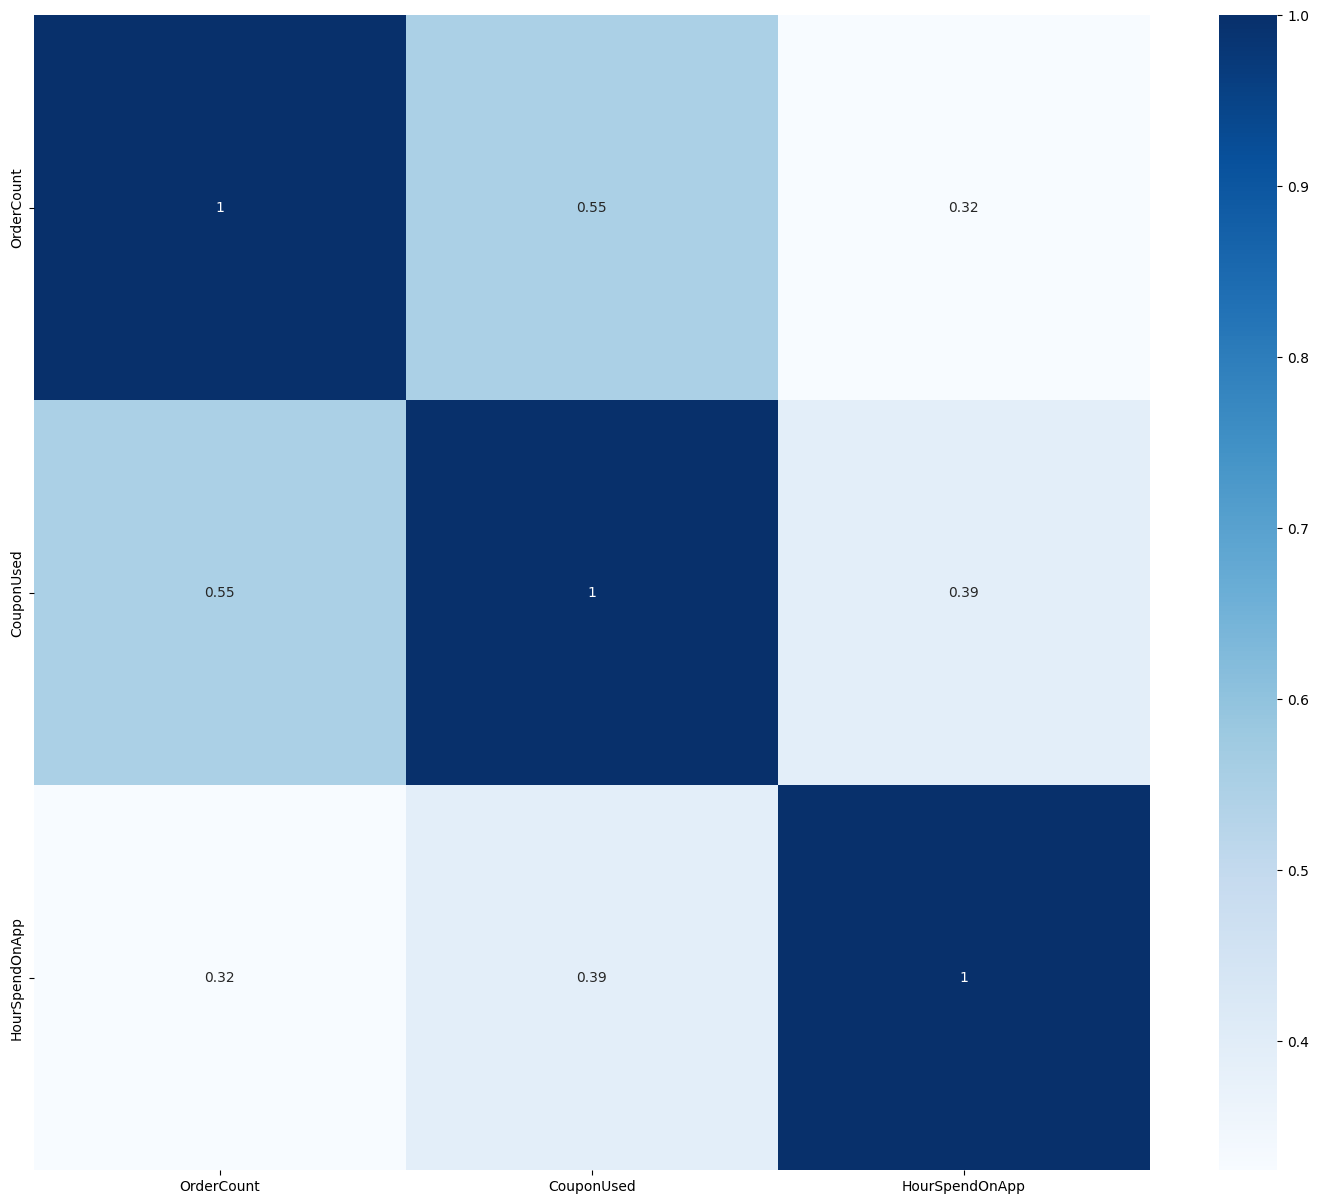

In [ ]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = StandardScaler().fit_transform(df)
X

array([[-0.95316311, -0.20386864,  0.0950724 ],
       [-0.95316311, -1.43784278,  0.0950724 ],
       [-0.95316311, -1.43784278, -1.31277091],
       ...,
       [ 0.16233516, -0.20386864,  0.0950724 ],
       [ 0.16233516,  1.0301055 ,  1.50291571],
       [ 0.16233516,  1.0301055 ,  0.0950724 ]])

In [ ]:
#Dimensional Reduction dengan PCA untuk visualisasi data

from sklearn.decomposition import PCA

pca=PCA(n_components=2)

In [ ]:
fit_pca = pca.fit_transform(X)

In [ ]:
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()

,PCA_1,PCA_2
4008,0.018971,-0.054923
4009,0.018971,-0.054923
4010,0.018971,-0.054923
4011,1.503933,-0.941001
4012,0.783474,0.251614


In [ ]:
finalDf = pd.concat([pca_df], axis = 1)
finalDf.head(5)

,PCA_1,PCA_2
0,-0.644989,-0.578940
1,-1.409491,-0.885477
2,-2.129950,0.307138
3,-2.129950,0.307138
4,-2.129950,0.307138


In [ ]:
finalDf.isnull().sum()

PCA_1    0
PCA_2    0
dtype: int64

In [ ]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA_1   4013 non-null   float64
 1   PCA_2   4013 non-null   float64
dtypes: float64(2)
memory usage: 62.8 KB


#Skema 2

Parameter yang digunakan:

*   n_clusters = 5
*   init = random
*   n_init = 1

In [ ]:
skema2_kmeans = KMeans(n_clusters=5, init='random', n_init=1)
skema2_kmeans.fit(finalDf)

KMeans(init='random', n_clusters=5, n_init=1)

In [ ]:
#Hasil clustering skema 2
labels_skema2_kmeans = skema2_kmeans.labels_
labels_skema2_kmeans

array([3, 3, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
print(skema2_kmeans.cluster_centers_)

[[-1.74577549  0.49911316]
 [ 2.24343562  1.24295796]
 [-0.21261443  1.47691205]
 [-0.99808664 -0.71519412]
 [ 0.74495425 -0.36398913]]


In [ ]:
SC_skema2_kmeans = silhouette_score(finalDf, labels_skema2_kmeans, metric='euclidean')
print('Silhouette Score model K-means Skema 2 = ', SC_skema2_kmeans)

Silhouette Score model K-means Skema 2 =  0.531661323401143


#Skema 3

Parameter yang digunakan:


*   n_clusters = 5
*   init = random
*   n_init = 2



In [ ]:
skema3_kmeans = KMeans(n_clusters=5, init='random', n_init=2)
skema3_kmeans.fit(finalDf)

KMeans(init='random', n_clusters=5, n_init=2)

In [ ]:
#Hasil Clustering Skema 3
labels_skema3_kmeans = skema3_kmeans.labels_
labels_skema3_kmeans

array([3, 3, 4, ..., 3, 1, 2], dtype=int32)

In [ ]:
print(skema3_kmeans.cluster_centers_)

[[ 0.73521688 -1.24998826]
 [ 1.79668353 -0.71502254]
 [ 1.09134981  0.80383245]
 [-0.55869639 -0.42679481]
 [-1.66680403  0.55815419]]


In [ ]:
SC_skema3_kmeans = silhouette_score(finalDf, labels_skema3_kmeans, metric='euclidean')
print('Silhouette Score model K-means Skema 3 = ', SC_skema3_kmeans)

Silhouette Score model K-means Skema 3 =  0.5596791311810245


#Skema 4

Parameter yang digunakan:


*   n_clusters = 5
*   init = k-means++
*   n_init = 1



In [ ]:
#Modeling Skema 4
skema4_kmeans = KMeans(n_clusters=5, init='k-means++', n_init=1)
skema4_kmeans.fit(finalDf)

KMeans(n_clusters=5, n_init=1)

In [ ]:
#Hasil Clustering Skema 4
labels_skema4_kmeans = skema4_kmeans.labels_
labels_skema4_kmeans

array([3, 3, 1, ..., 0, 2, 0], dtype=int32)

In [ ]:
print(skema4_kmeans.cluster_centers_)

[[ 0.38003739  0.22229866]
 [-1.66680403  0.55815419]
 [ 1.21083363 -1.03310204]
 [-0.99808664 -0.71519412]
 [ 2.16423823  1.28715682]]


In [ ]:
SC_skema4_kmeans = silhouette_score(finalDf, labels_skema4_kmeans, metric='euclidean')
print('Silhouette Score model K-means Skema 4 = ', SC_skema4_kmeans)

Silhouette Score model K-means Skema 4 =  0.6138152194370733


#Skema 5

Parameter yang digunakan:


*   n_clusters = 5
*   init = k-means++
*   n_init = 2



In [ ]:
#Modeling Skema 5
skema5_kmeans = KMeans(n_clusters=5, init='k-means++', n_init=2)
skema5_kmeans.fit(finalDf)

KMeans(n_clusters=5, n_init=2)

In [ ]:
#Hasil Clustering Skema 5
labels_skema5_kmeans = skema5_kmeans.labels_
labels_skema5_kmeans

array([1, 0, 0, ..., 1, 4, 3], dtype=int32)

In [ ]:
print(skema5_kmeans.cluster_centers_)

[[-1.60484084  0.19242998]
 [-0.26011783 -0.26758103]
 [ 2.49148071  1.35202843]
 [ 0.74996522  0.54558311]
 [ 1.21083363 -1.03310204]]


In [ ]:
SC_skema5_kmeans = silhouette_score(finalDf, labels_skema5_kmeans, metric='euclidean')
print('Silhouette Score model K-means Skema 5 = ', SC_skema5_kmeans)

Silhouette Score model K-means Skema 5 =  0.5543097051201072


#Skema 6

Parameter yang digunakan:


*   n_clusters = 6
*   init = random
*   n_init = 1


In [ ]:
#Modeling Skema 6
skema6_kmeans = KMeans(n_clusters=6, init='random', n_init=1)
skema6_kmeans.fit(finalDf)

KMeans(init='random', n_clusters=6, n_init=1)

In [ ]:
#Hasil Clustering Skema 6
labels_skema6_kmeans = skema6_kmeans.labels_
labels_skema6_kmeans

array([2, 2, 2, ..., 2, 1, 1], dtype=int32)

In [ ]:
print(skema6_kmeans.cluster_centers_)

[[ 2.32657982  0.97867561]
 [ 1.12232254 -0.23216266]
 [-1.05267108 -0.04556457]
 [-0.40529618  1.41598136]
 [ 0.73521688 -1.24998826]
 [ 1.50048717  2.54841543]]


In [ ]:
SC_skema6_kmeans = silhouette_score(finalDf, labels_skema6_kmeans, metric='euclidean')
print('Silhouette Score model K-means Skema 6 = ', SC_skema6_kmeans)

Silhouette Score model K-means Skema 6 =  0.3685699398485202


#Skema 7

Parameter yang digunakan:


*   n_clusters = 6
*   init = random
*   n_init = 2

In [ ]:
#Modeling Skema 7
skema7_kmeans = KMeans(n_clusters=6, init='random', n_init=2)
skema7_kmeans.fit(finalDf)

KMeans(init='random', n_clusters=6, n_init=2)

In [ ]:
#Hasil Clustering Skema 7
labels_skema7_kmeans = skema7_kmeans.labels_
labels_skema7_kmeans

array([0, 0, 3, ..., 0, 4, 1], dtype=int32)

In [ ]:
print(skema7_kmeans.cluster_centers_)

[[-0.55880358 -0.42815279]
 [ 0.75847769  0.49388257]
 [ 2.6672868   1.01758757]
 [-1.66988889  0.55135383]
 [ 1.21083363 -1.03310204]
 [ 1.42031232  2.55430281]]


In [ ]:
SC_skema7_kmeans = silhouette_score(finalDf, labels_skema7_kmeans, metric='euclidean')
print('Silhouette Score model K-means Skema 7 = ', SC_skema7_kmeans)

Silhouette Score model K-means Skema 7 =  0.5840041589102644


#Skema 8

Parameter yang digunakan:


*   n_clusters = 6
*   init = k-means++
*   n_init = 1

In [ ]:
#Modeling Skema 8
skema8_kmeans = KMeans(n_clusters=6, init='k-means++', n_init=1)
skema8_kmeans.fit(finalDf)

KMeans(n_clusters=6, n_init=1)

In [ ]:
#Hasil Clustering Skema 8
labels_skema8_kmeans = skema8_kmeans.labels_
labels_skema8_kmeans

array([1, 1, 2, ..., 5, 4, 3], dtype=int32)

In [ ]:
print(skema8_kmeans.cluster_centers_)

[[ 2.49148071  1.35202843]
 [-0.99808664 -0.71519412]
 [-1.66680403  0.55815419]
 [ 0.75566057  0.53703072]
 [ 1.21083363 -1.03310204]
 [ 0.01744227 -0.05161567]]


In [ ]:
SC_skema8_kmeans = silhouette_score(finalDf, labels_skema8_kmeans, metric='euclidean')
print('Silhouette Score model K-means Skema 8 = ', SC_skema8_kmeans)

Silhouette Score model K-means Skema 8 =  0.6378908559987754


#Skema 9

Parameter yang digunakan:


*   n_clusters = 6
*   init = k-means++
*   n_init = 2

In [ ]:
#Modeling Skema 9
skema9_kmeans = KMeans(n_clusters=6, init='k-means++', n_init=2)
skema9_kmeans.fit(finalDf)

KMeans(n_clusters=6, n_init=2)

In [ ]:
#Hasil Clustering Skema 9
labels_skema9_kmeans = skema9_kmeans.labels_
labels_skema9_kmeans

array([4, 4, 2, ..., 0, 3, 5], dtype=int32)

In [ ]:
SC_skema9_kmeans = silhouette_score(finalDf, labels_skema9_kmeans, metric='euclidean')
print('Silhouette Score model K-means Skema 9 = ', SC_skema9_kmeans)

Silhouette Score model K-means Skema 9 =  0.6378908559987754
